In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-10 14:58:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.4MB/s    in 2.3s    

2025-04-10 14:58:08 (66.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("survey-data.csv")

In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


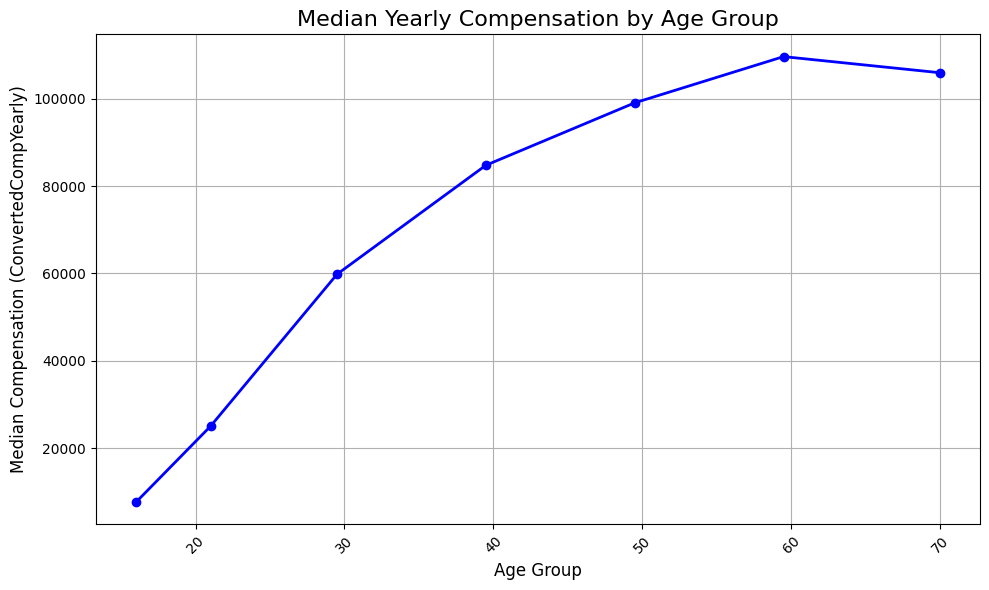

In [9]:
#1.1. Line Chart of Median ConvertedCompYearly by Age Group
age_mapping = { "Under 18 years old": 16, "18-24 years old": 21, "25-34 years old": 29.5, "35-44 years old": 39.5, "45-54 years old": 49.5, "55-64 years old": 59.5, "65 years or older": 70 } 
df["AgeNumeric"] = df["Age"].map(age_mapping)

median_compensation_by_age = df.groupby('AgeNumeric')['ConvertedCompYearly'].median()


plt.figure(figsize=(10, 6))
plt.plot(median_compensation_by_age.index, median_compensation_by_age.values, marker='o', color='b', linestyle='-', linewidth=2)


plt.title('Median Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (ConvertedCompYearly)', fontsize=12)
plt.xticks(rotation=45)  # Rotate age group labels for better visibility
plt.grid(True)

plt.tight_layout()
plt.show()

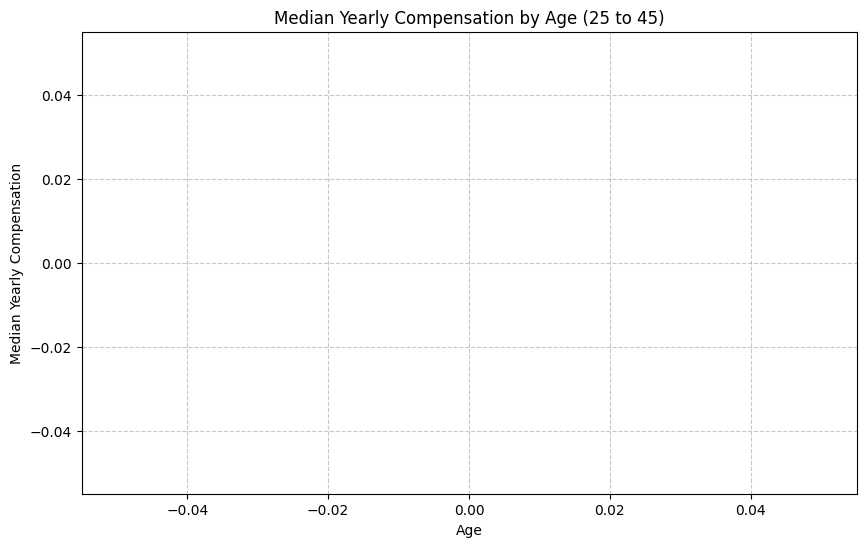

In [12]:
#1.2. Line Chart of Median ConvertedCompYearly for Ages 25 to 45
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
age_mapping = { "Under 18 years old": 16, "18-24 years old": 21, "25-34 years old": 29.5, "35-44 years old": 39.5, "45-54 years old": 49.5, "55-64 years old": 59.5, "65 years or older": 70 } 
df["AgeNumeric"] = df["Age"].map(age_mapping)
df.dropna(subset=["Age", "ConvertedCompYearly"], inplace=True)

median_compensation_by_age = df.groupby("AgeNumeric")["ConvertedCompYearly"].median()

plt.figure(figsize=(10, 6))
plt.plot(median_compensation_by_age.index, median_compensation_by_age.values, marker='o', color='#1f77b4', linestyle='-', linewidth=2)

plt.xlabel("Age")
plt.ylabel("Median Yearly Compensation")
plt.title("Median Yearly Compensation by Age (25 to 45)")
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

/tmp/ipykernel_2858/2757006380.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_job_satisfaction = df.groupby("ExperienceLevel")["JobSatPoints_6"].mean()


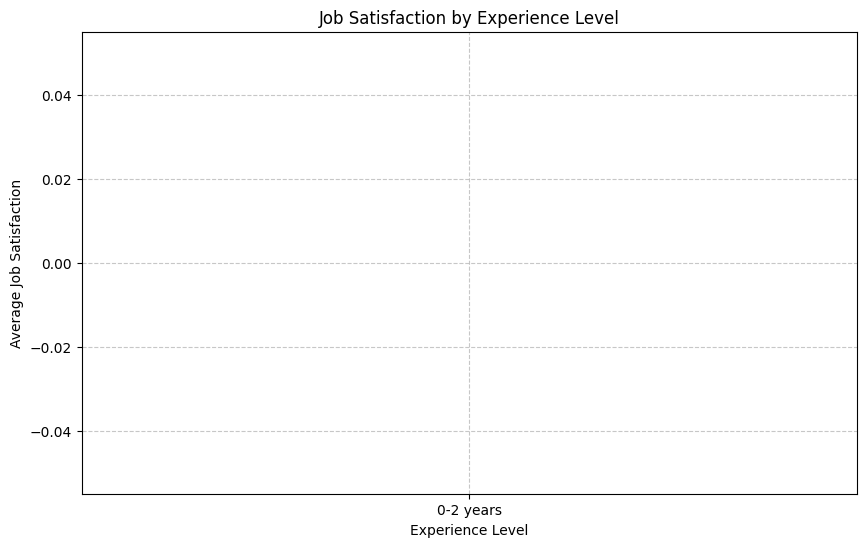

In [13]:
#2.1. Line Chart of Job Satisfaction (JobSatPoints_6) by Experience Level
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

df.dropna(subset=["YearsCodePro", "JobSatPoints_6"], inplace=True)
bins = [0, 2, 5, 10, 20, 30, 50] 
labels = ["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21-30 years", "30+ years"]
df["ExperienceLevel"] = pd.cut(df["YearsCodePro"], bins=bins, labels=labels, right=False)
avg_job_satisfaction = df.groupby("ExperienceLevel")["JobSatPoints_6"].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_job_satisfaction.index, avg_job_satisfaction.values, marker='o', color='#1f77b4', linestyle='-', linewidth=2)
plt.xlabel("Experience Level")
plt.ylabel("Average Job Satisfaction")
plt.title("Job Satisfaction by Experience Level")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

/tmp/ipykernel_2858/3324785229.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_compensation = df.groupby("ExperienceLevel")["ConvertedCompYearly"].median()


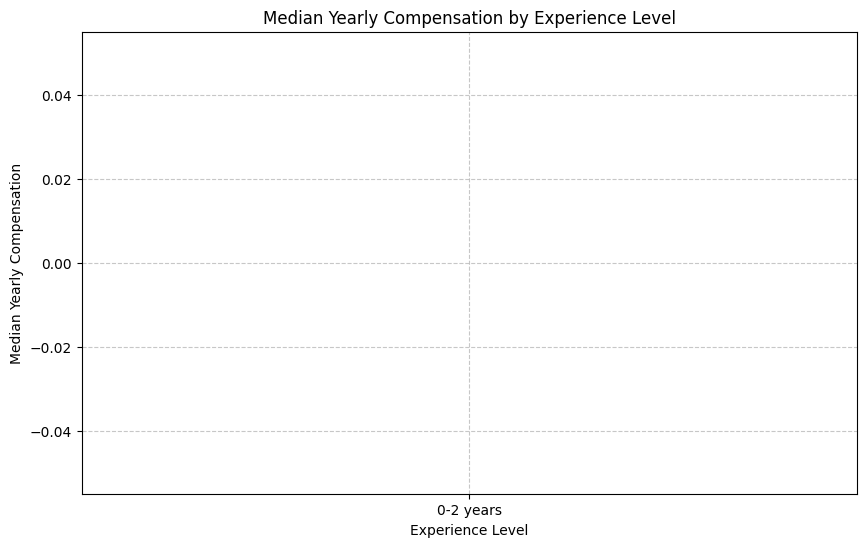

In [14]:
#3.1.Line Chart of Median ConvertedCompYearly Over Experience Level
df["WorkExp"] = pd.to_numeric(df["WorkExp"], errors="coerce")
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df.dropna(subset=["WorkExp", "ConvertedCompYearly"], inplace=True)

bins = [0, 2, 5, 10, 20, 30, 50]  # Adjust as needed
labels = ["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21-30 years", "30+ years"]
df["ExperienceLevel"] = pd.cut(df["WorkExp"], bins=bins, labels=labels, right=False)

median_compensation = df.groupby("ExperienceLevel")["ConvertedCompYearly"].median()

plt.figure(figsize=(10, 6))
plt.plot(median_compensation.index, median_compensation.values, marker='o', color='#1f77b4', linestyle='-', linewidth=2)

plt.xlabel("Experience Level")
plt.ylabel("Median Yearly Compensation")
plt.title("Median Yearly Compensation by Experience Level")
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

In [ ]:
#3.2.Line Chart of Job Satisfaction (JobSatPoints_6) Across Experience Levels
df["WorkExp"] = pd.to_numeric(df["WorkExp"], errors="coerce")
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

df.dropna(subset=["WorkExp", "JobSatPoints_6"], inplace=True)

# Define Experience Levels (WorkExp Bins or YearsCodePro Bins)
bins = [0, 2, 5, 10, 20, 30, 50]  # Adjust as needed
labels = ["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21-30 years", "30+ years"]
df["ExperienceLevel"] = pd.cut(df["WorkExp"], bins=bins, labels=labels, right=False)

# Group by ExperienceLevel and calculate the mean JobSatPoints_6 for each experience level
avg_job_satisfaction = df.groupby("ExperienceLevel")["JobSatPoints_6"].mean()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_job_satisfaction.index, avg_job_satisfaction.values, marker='o', color='#1f77b4', linestyle='-', linewidth=2)

# Labels and title
plt.xlabel("Experience Level")
plt.ylabel("Average Job Satisfaction")
plt.title("Job Satisfaction Across Experience Levels")
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()